In [1]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install numpy
!pip3 install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1

1.Load the data into a Pandas Dataframe.

In [2]:
mobile_specs = pd.read_csv('mobile_price_1.csv', index_col='id') 

2.Which of the categorical features are nominal and which are ordinal?

3.Add a column that holds the total screen resolution for each device. Name it resolution.

In [3]:
mobile_specs['resolution'] = mobile_specs['px_width'] * mobile_specs['px_height']

4.Add a column that holds the DPI (dots per inch) of the screen width and name it DPI_w.

In [4]:
mobile_specs['DPI_w'] = np.round(2.54 * mobile_specs['px_width'] /mobile_specs['sc_w'], 1)

5.Add a column that holds the ratio battery_power/talk_time and name it call_ratio.

In [5]:
mobile_specs['call_ratio'] = mobile_specs['battery_power'] / mobile_specs['talk_time']

6.Change the memory column to hold the memory in GB instead of MB.

In [6]:
mobile_specs['memory'] /= 1024

7.Include the output of the `describe()` function of the dataframe.

In [7]:
mobile_specs.describe()

,battery_power,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,gen,f_camera,camera,memory,price,resolution,DPI_w,call_ratio
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1526.000000,1899.000000,2000.000000,2000.00000,2.000000e+03,2000.000,2000.000000
mean,1238.518500,0.501750,140.249000,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,3.283000,5.648100,10.443918,31.783456,862.02435,9.052601e+05,inf,166.672629
std,439.418206,0.288416,35.399655,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.824773,4.140169,5.763826,17.735803,230.26348,8.297625e+05,NaN,156.664965
min,501.000000,0.100000,80.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.908203,307.11000,0.000000e+00,81.300,25.100000
25%,851.750000,0.200000,109.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,3.000000,2.000000,6.000000,16.036133,698.46750,2.632005e+05,339.625,75.737500
50%,1226.000000,0.500000,141.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,4.000000,5.000000,10.000000,31.545898,837.63000,6.013590e+05,599.150,111.369318
75%,1615.250000,0.800000,170.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,4.000000,8.000000,15.000000,47.207275,1006.71250,1.359027e+06,1524.200,186.193750
max,1998.000000,1.000000,200.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,4.000000,19.000000,20.000000,63.400391,1728.97000,3.886306e+06,inf,989.500000


8.Include a histogram of the prices.

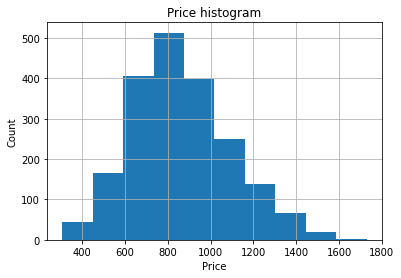

In [8]:
mobile_specs.hist(column="price")
plt.title("Price histogram") 
plt.xlabel('Price')  
plt.ylabel('Count') 
plt.show()

# Task 2

1.Plot a correlation heatmap of the data set and include it.

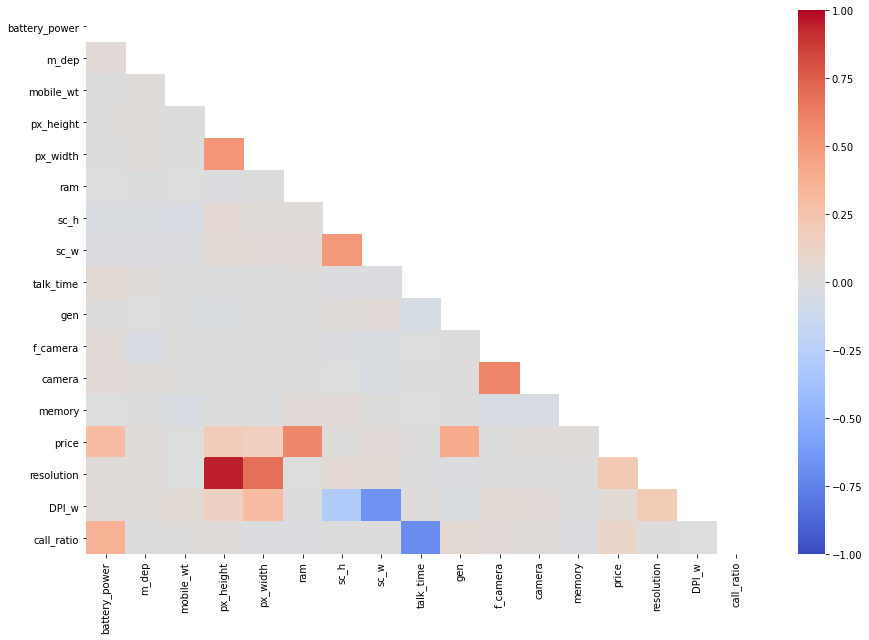

In [9]:
corr = mobile_specs.corr()
matrix = np.triu(mobile_specs.corr())
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot=False, vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)
plt.show()

2.Which features would you say are correlated with the device price?

3.Are there features not shown in the correlation matrix that are correlated with the price? If so, what are they? 

4.For each feature correlated with the price, plot its relationship with price.

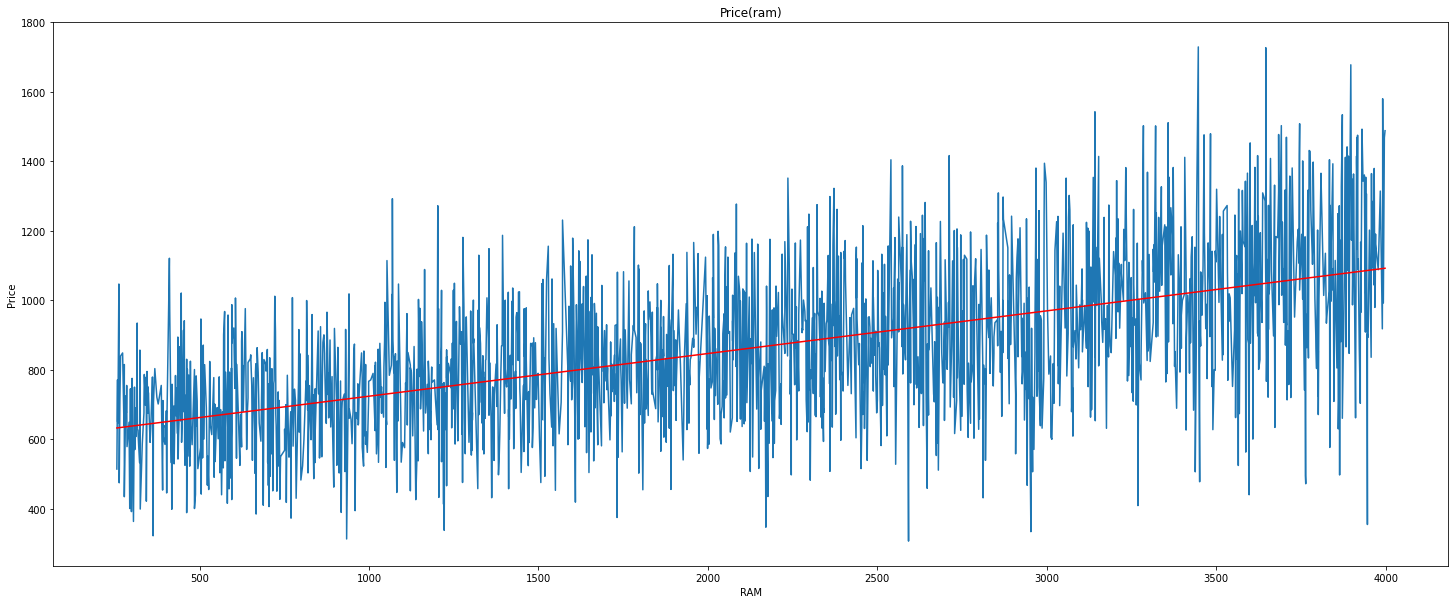

In [10]:
mobile_specs = mobile_specs.sort_values(["ram"])
plt.figure(figsize = (25,10))
plt.plot(mobile_specs.ram , mobile_specs.price)
plt.plot(np.unique(mobile_specs["ram"]),
         np.poly1d(np.polyfit(mobile_specs["ram"],mobile_specs["price"],1))(np.unique(mobile_specs["ram"])),
                              color="red")
plt.title("Price(ram)") 
plt.xlabel('RAM')  
plt.ylabel('Price')  
plt.show()

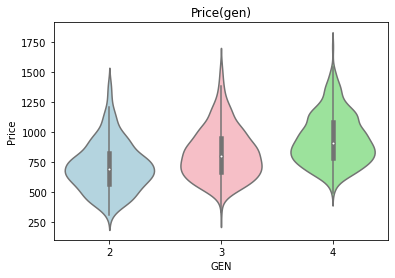

In [11]:
sns.violinplot(x=mobile_specs.gen, y=mobile_specs.price, data=mobile_specs, palette=["lightblue", "lightpink","lightgreen"]);
plt.title("Price(gen)") 
plt.xlabel('GEN')  
plt.ylabel('Price')
plt.show()

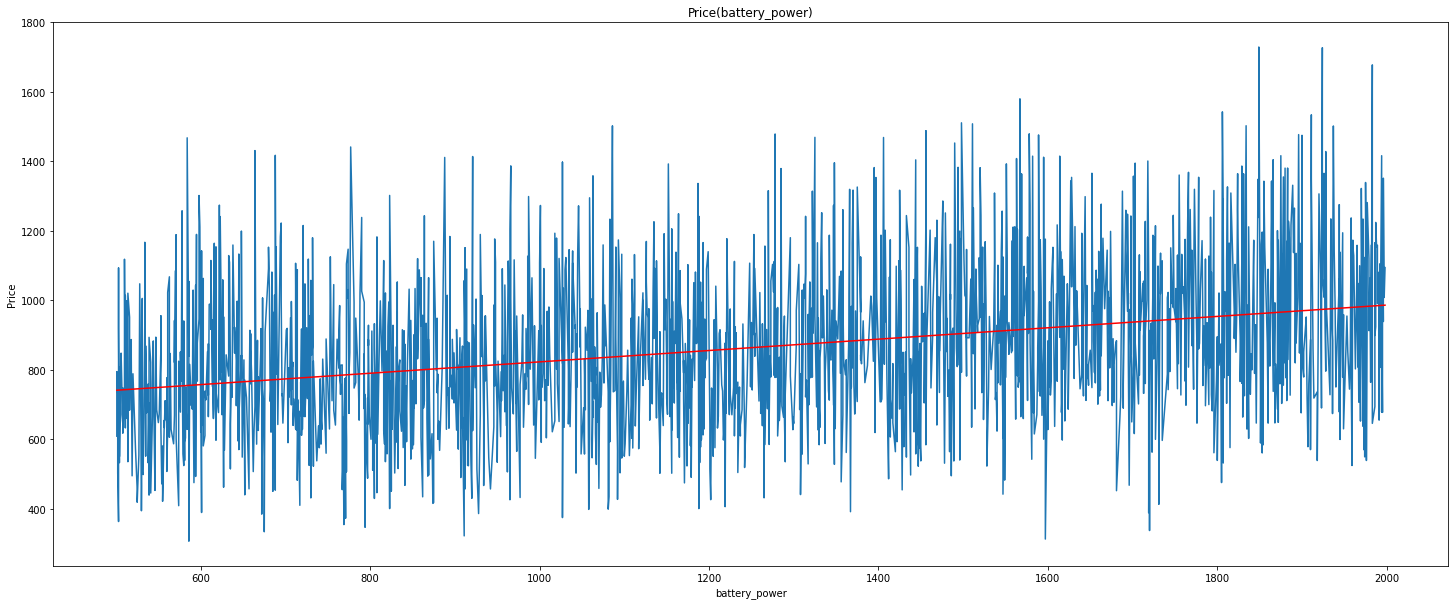

In [12]:
mobile_specs = mobile_specs.sort_values(["battery_power"])
plt.figure(figsize = (25,10))
plt.plot(mobile_specs.battery_power,mobile_specs.price)
plt.title("Price(battery_power)") 
plt.xlabel('battery_power')  
plt.ylabel('Price')  
plt.plot(np.unique(mobile_specs["battery_power"]),
        np.poly1d(np.polyfit(mobile_specs["battery_power"],
        mobile_specs["price"],1))(np.unique(mobile_specs["battery_power"])),
        color="red")
plt.show()

5.Select 3 features that are correlated with price and create a pivot table showing average price with relation to cross sections of those 3 features (remember to divide numerical features into cuts, for example quartile cuts).

In [13]:
ram4 = pd.qcut(mobile_specs['ram'],4)
bt4 = pd.qcut(mobile_specs['battery_power'],2)
p_table = mobile_specs.pivot_table('price' ,'gen',[ram4,bt4] )
p_table

ram           (255.999, 1207.5]                   (1207.5, 2146.5]  \
battery_power (500.999, 1226.0] (1226.0, 1998.0] (500.999, 1226.0]   
gen                                                                  
2                    496.786875       637.339524        626.627500   
3                    591.017407       727.331639        741.051094   
4                    720.640373       823.459677        832.687970   

ram                             (2146.5, 3064.5]                   \
battery_power (1226.0, 1998.0] (500.999, 1226.0] (1226.0, 1998.0]   
gen                                                                 
2                   702.527895        673.855833       819.002542   
3                   814.735000        795.269714       913.087581   
4                   944.440227        916.418279      1050.964961   

ram            (3064.5, 3998.0]                   
battery_power (500.999, 1226.0] (1226.0, 1998.0]  
gen                                               
2                    823.769455       971.410169  
3                    969.605000      1079.788113  
4                   1049.146475      1197.299329

# Task 3

1.For each ordinal feature <O>, add a column to the dataframe which holds the ordered values representing each original value of F. This new column will be named <O>_ord. (without the triangle brackets)!

In [14]:
mobile_specs = mobile_specs.sort_values("id")
mobile_specs['cores_ord']=mobile_specs['cores'].replace({'single':1, 'dual':2, 'triple':3, 'quad':4, 'penta':5, 'hexa':6, 'hepta':7, 'octa':8})
mobile_specs[['cores_ord','cores']]

,cores_ord,cores
id,,
0,2,dual
1,3,triple
2,5,penta
3,6,hexa
4,2,dual
...,...,...
1995,6,hexa
1996,4,quad
1997,8,octa


In [15]:
mobile_specs['speed_ord']=mobile_specs['speed'].replace({'low':1, 'medium':2, 'high':3})
mobile_specs[['speed_ord','speed']]

,speed_ord,speed
id,,
0,2,medium
1,1,low
2,1,low
3,3,high
4,2,medium
...,...,...
1995,1,low
1996,3,high
1997,1,low


In [16]:
mobile_specs['wifi_ord']=mobile_specs['wifi'].replace({'none':-1,'b':1, 'a':2, 'g':3, 'n':4})
mobile_specs[['wifi_ord','wifi']]

,wifi_ord,wifi
id,,
0,3,g
1,-1,none
2,-1,none
3,-1,none
4,-1,none
...,...,...
1995,-1,none
1996,4,n
1997,-1,none


In [17]:
mobile_specs['sim_ord']=mobile_specs['sim'].replace({'Single':1, 'Dual':2})
mobile_specs[['sim_ord','sim']]

,sim_ord,sim
id,,
0,1,Single
1,2,Dual
2,2,Dual
3,1,Single
4,1,Single
...,...,...
1995,2,Dual
1996,2,Dual
1997,2,Dual


2.For each nominal feature <N>, add a binary column OR one-hot encoding (whichever is relevant for that feature) to the dataframe representing the original values. Name binary columns <N>_bin, and prefix one-hot encodings with <N>. (without the triangle brackets)

In [18]:
mobile_specs = pd.concat([mobile_specs,pd.get_dummies(mobile_specs["screen"])] , axis = 1)
mobile_specs.head()

,battery_power,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,bluetooth,...,price,resolution,DPI_w,call_ratio,cores_ord,speed_ord,wifi_ord,sim_ord,LCD,Touch
id,,,,,,,,,,,,,,,,,,,,,
0,842,0.6,188,20,756,2549,9,7,19,No,...,751.64,15120,274.3,44.315789,2,2,3,1,1,0
1,1021,0.7,136,905,1988,2631,17,3,7,Yes,...,885.17,1799140,1683.2,145.857143,3,1,-1,2,0,1
2,563,0.9,145,1263,1716,2603,11,2,9,Yes,...,1067.78,2167308,2179.3,62.555556,5,1,-1,2,0,1
3,615,0.8,131,1216,1786,2769,16,8,11,Yes,...,819.22,2171776,567.1,55.909091,6,3,-1,1,1,0
4,1821,0.6,141,1208,1212,1411,8,2,15,Yes,...,1023.13,1464096,1539.2,121.400000,2,2,-1,1,0,1


In [19]:
mobile_specs['bluetooth_bin']=mobile_specs['bluetooth'].replace({'Yes':1, 'No':0})
mobile_specs[['bluetooth_bin','bluetooth']]

,bluetooth_bin,bluetooth
id,,
0,0,No
1,1,Yes
2,1,Yes
3,1,Yes
4,1,Yes
...,...,...
1995,1,Yes
1996,1,Yes
1997,0,No


3.Plot a correlation heatmap of the modified data set and include it.

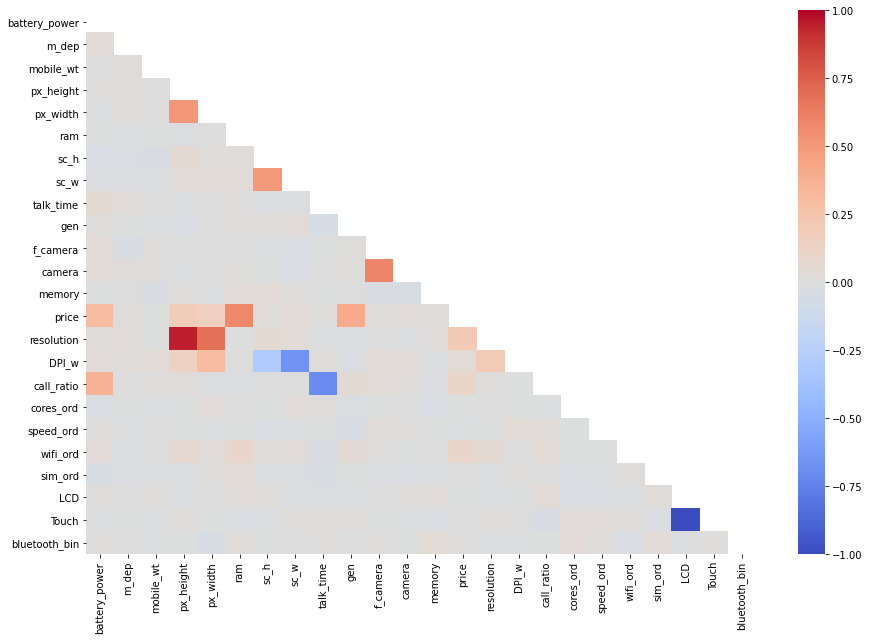

In [20]:
corr = mobile_specs.corr()
plt.figure(figsize = (15,10))
matrix = np.triu(mobile_specs.corr())
sns.heatmap(corr, annot=False, vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)
plt.show()

4.Save the entire dataframe to a csv file named “mobile_prices_converted.csv” and include it in the submission. Make sure you don’t add a redundant index column.

In [21]:
mobile_specs = mobile_specs.sort_values(["id"])
mobile_specs.to_csv('mobile_prices_converted.csv')

# Task 4

1.Choose 4 features and use a 2-d plot to show the relationships between each pair. This should be done in the form of a 4x4 plot matrix as shown in class.

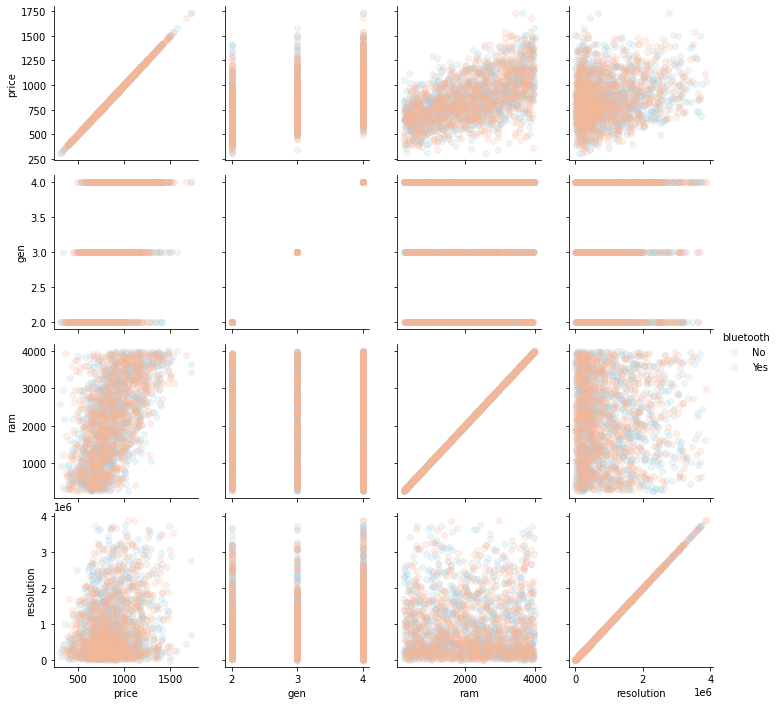

In [22]:
g = sns.PairGrid(mobile_specs, vars=['price', 'gen', 'ram', 'resolution'],hue = "bluetooth" ,palette='RdBu_r')
g.map(plt.scatter, alpha=0.2)
g.add_legend()

2.We have shown in class how to plot 4 dimensions of data in a 2-dimensional plot. Use this method to plot the relationship between px_width, px_height, price and core. Px_width and px_height should be the X and Y coordinates respectively. 

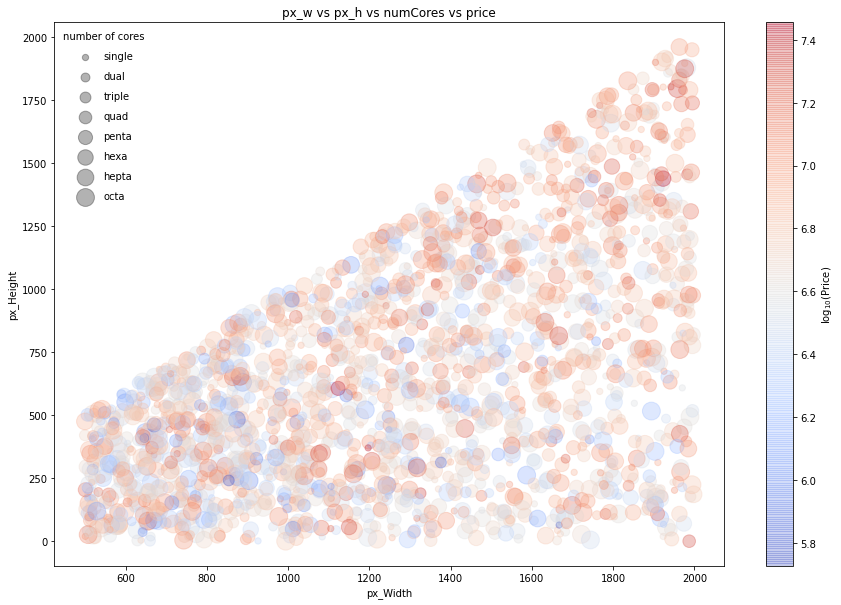

In [23]:
mobile_specs['price_log'] = np.log(mobile_specs['price'])
plt.figure(figsize = (15,10))
plt.scatter(x=mobile_specs['px_width'], y=mobile_specs['px_height'], s=(mobile_specs['cores_ord'] * 40),
            c=mobile_specs['price_log'], alpha=0.3,
            cmap='coolwarm')
plt.title("px_w vs px_h vs numCores vs price")
plt.xlabel("px_Width")
plt.ylabel("px_Height")
plt.colorbar(label='log$_{10}$(Price)')
for i, val in enumerate(['single','dual','triple','quad','penta','hexa','hepta','octa']):
    plt.scatter([], [], c='k', alpha=0.3, s=(i+1)*40,
            label=str(val))
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='number of cores')
plt.show()

3.There is an additional file named “mobile_prices_2.csv” distributed alongside the exercise. This file contains a mapping of id to price. This price is a transformation of the price in the original data set. The transformation has been made based on a single feature from the data set. Which feature was used and how do you know? Include any relevant plots and tables.

In [24]:
mobile_specs_2 = pd.read_csv('mobile_price_2.csv', index_col='id') 
mobile_specs["price_diff"] = mobile_specs_2.price_2 / mobile_specs.price
mobile_specs = mobile_specs.sort_values('price_diff')
mobile_specs[['price','price_diff']]

,price,price_diff
id,,
1989,307.11,0.949985
1411,482.30,0.949990
943,454.71,0.949990
1011,507.10,0.949990
884,467.71,0.949990
...,...,...
568,663.75,1.100008
1200,394.67,1.100008
1707,650.25,1.100008


<AxesSubplot:xlabel='price_diff', ylabel='camera'>

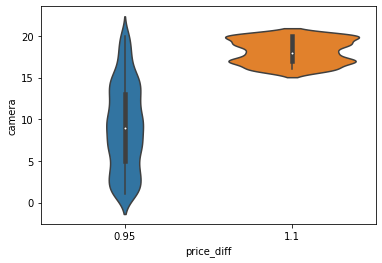

In [25]:
mobile_specs.loc[(mobile_specs.price_diff > 1), 'price_diff']=1.1
mobile_specs.loc[(mobile_specs.price_diff < 1), 'price_diff']=0.95
sns.violinplot(x='price_diff',y='camera',data=mobile_specs)